# Tweet classification: Trump vs. Trudeau

# 1. Import the libraries

- Note : use a specific random state for your solution.

In [26]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn import datasets, svm, model_selection, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Read the dataset

In [27]:
df = pd.read_csv('tweets.csv')
df.head()

,id,author,status
0,1,Donald J. Trump,I will be making a major statement from the @W...
1,2,Donald J. Trump,Just arrived at #ASEAN50 in the Philippines fo...
2,3,Donald J. Trump,"After my tour of Asia, all Countries dealing w..."
3,4,Donald J. Trump,Great to see @RandPaul looking well and back o...
4,5,Donald J. Trump,Excited to be heading home to see the House pa...


# 3. Split the dataset into X and y

In [28]:
X =df["status"]
y =df["author"]

# 4. Split the dataset into training set and testing set

In [29]:
X_train , X_test , y_train , y_test =train_test_split(X , y , test_size=0.2, random_state=152)

# 5. Vectorize the tweets

- Note : Read about CountVectorizer and TfidfVectorizer methods and use them in training and testing dataset.

In [30]:
count_vectorizer, tfidf_vectorizer = CountVectorizer() , TfidfVectorizer()
X_train_counts = count_vectorizer.fit_transform(X_train)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_counts = count_vectorizer.transform(X_test)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 6. Train a Logistic Regression model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [31]:
log_reg = LogisticRegression()

tf_logreg = log_reg.fit(X_train_tfidf, y_train)
C_logreg = log_reg.fit(X_train_counts, y_train)

# 7. Train a SVM model

- Build and train two models, the first by using the tfidf data, and the second by using count vectorize data.

In [32]:
svm = svm.SVC()

tf_svm  = svm.fit(X_train_tfidf, y_train)
C_svm = svm.fit(X_train_counts, y_train)

# 8. Make a prediction and calculate the score for both Logistic Regression and SVM

In [42]:
tf_logreg_pred = log_reg.predict(X_test_tfidf)
C_logreg_pred = log_reg.predict(X_test_counts)
tf_svm_pred = svm.predict(X_test_tfidf)
C_svm_pred = svm.predict(X_test_counts)

## SVM

In [43]:
print('tfidf_svm_pred Accuracy :', accuracy_score(y_test, tfidf_svm_pred))
print('counts_svm_pred Accuracy :', accuracy_score(y_test, counts_svm_pred))

tfidf_svm_pred Accuracy : 0.45
counts_svm_pred Accuracy : 0.8375


## Logreg

In [44]:
print('tfidf_logreg_pred Accuracy :', accuracy_score(y_test, tfidf_logreg_pred))
print('counts_logreg_pred Accuracy :', accuracy_score(y_test, counts_logreg_pred))

tfidf_logreg_pred Accuracy : 0.4625
counts_logreg_pred Accuracy : 0.9


# 9. Plot a confusion matrix for both Logistic Regression and SVM

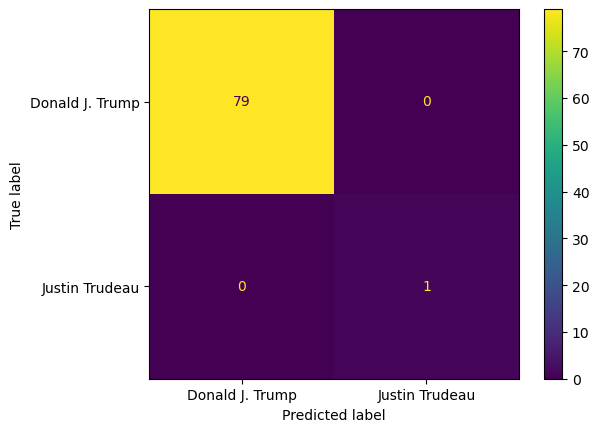

In [46]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(log_reg, X_test_tfidf, tf_logreg_pred);

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


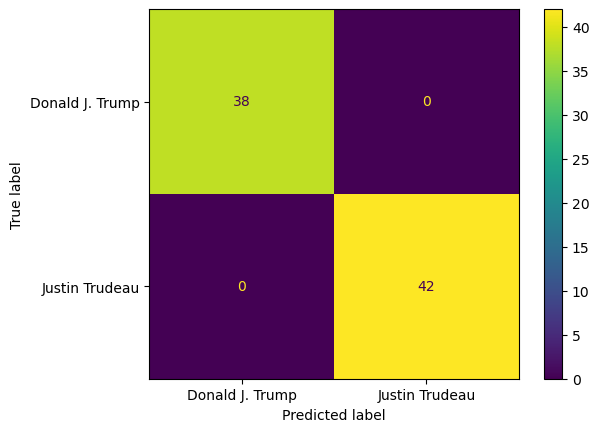

In [47]:
plot_confusion_matrix(log_reg, X_test_counts, C_logreg_pred);

## SVM

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


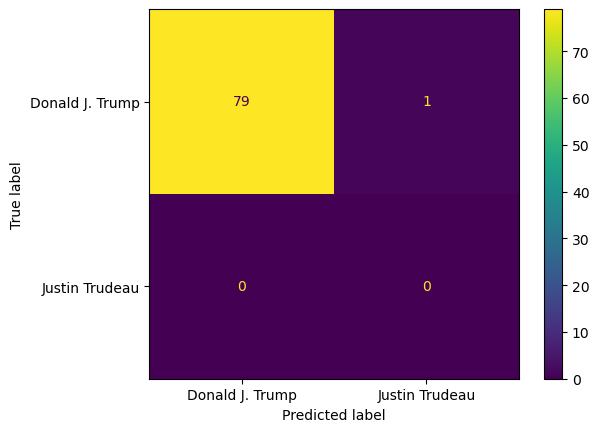

In [49]:
plot_confusion_matrix(log_reg, X_test_tfidf, tf_svm_pred);

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


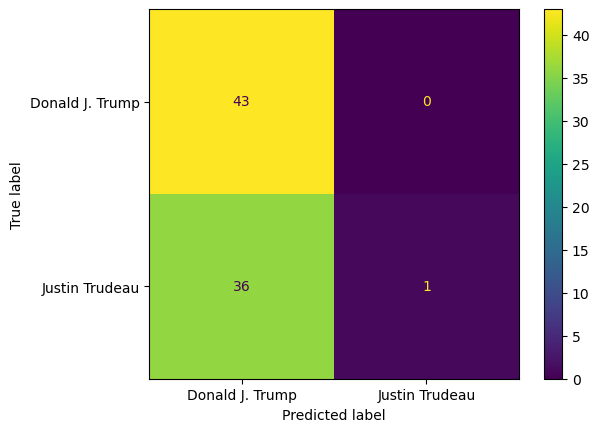

In [50]:
plot_confusion_matrix(log_reg, X_test_tfidf, counts_svm_pred);